In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
df.shape

(214, 10)

In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
X=df.drop('Type',axis=1)
y=df['Type']

In [8]:
y.value_counts()
# So we can clearly see here this is the case of class imbalance and we have to handle it because if not then higher count class label will dominate and model will be a biased one 

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
smote=SMOTE()
X,y=smote.fit_resample(X,y)

In [11]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,1.518075,13.597313,2.110299,1.585183,72.691813,0.528806,9.103349,0.214972,0.046933
std,0.002658,0.896415,1.518822,0.547244,0.807565,0.944708,1.366185,0.509499,0.089792
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516460,12.999811,0.257681,1.269710,72.377239,0.000000,8.383820,0.000000,0.000000
50%,1.517696,13.435503,2.390220,1.540000,72.747415,0.483794,8.762203,0.000000,0.000000
75%,1.519194,14.202466,3.520000,1.840520,73.104134,0.590000,9.716020,0.034665,0.063017
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


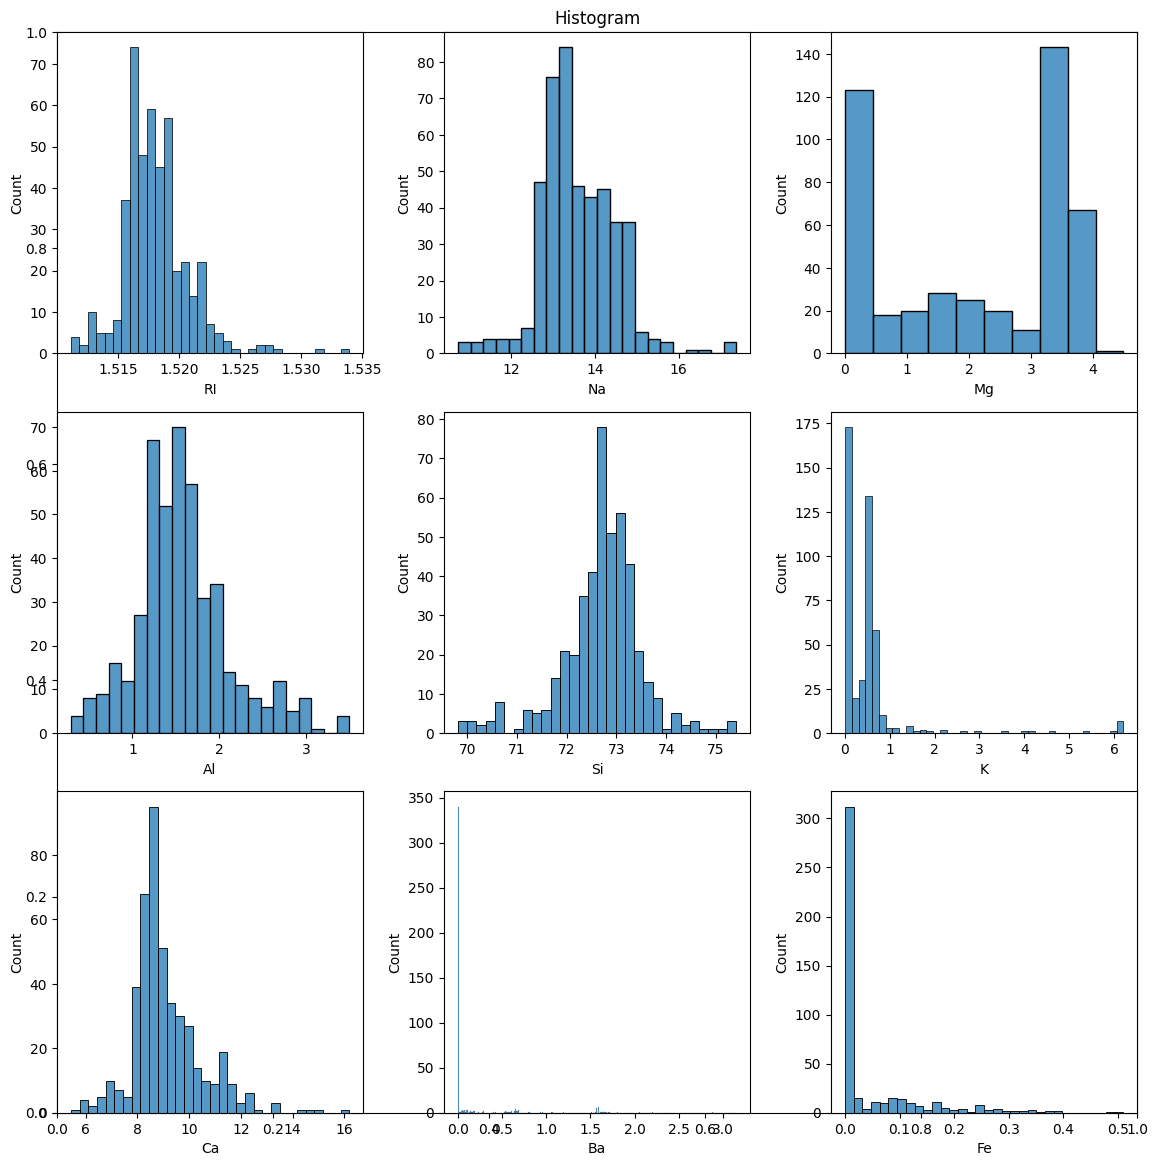

In [12]:
plt.figure(figsize=(12,12))
plt.title('Histogram')
for i,name in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(x=X[name])
    plt.tight_layout()
plt.show()

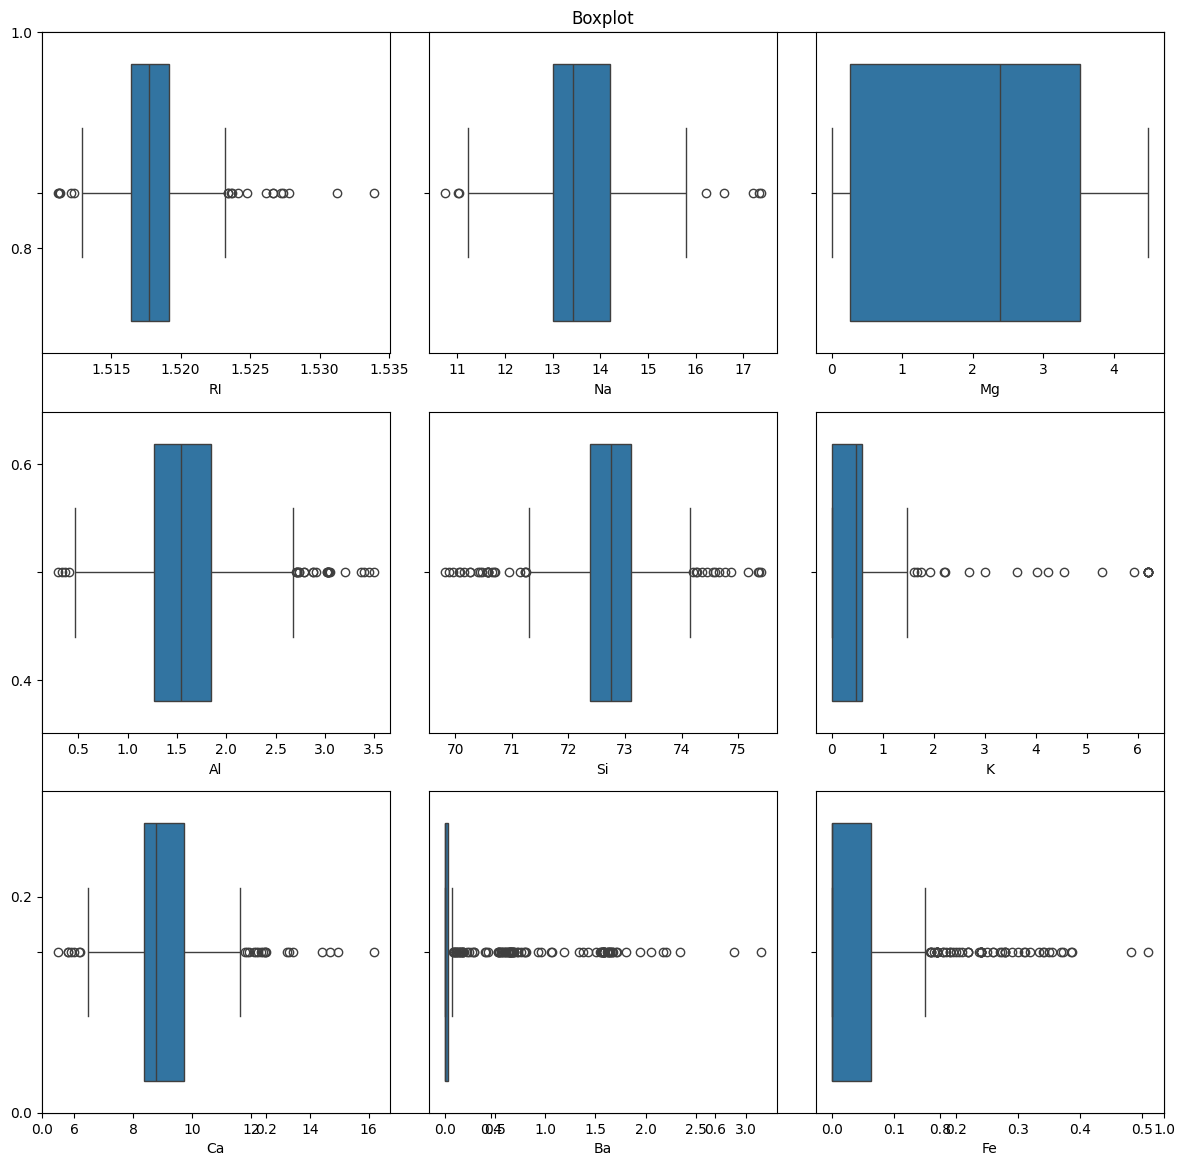

In [13]:
plt.figure(figsize=(12,12))
plt.title('Boxplot')
for i,name in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=X[name])
    plt.tight_layout()
plt.show()

In [14]:

for name in X.columns:
    Q1=X[name].quantile(0.25)
    Q3=X[name].quantile(0.75)
    
    IQR=Q3-Q1
    
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    
    X[name]=X[name].clip(lower_limit,upper_limit)

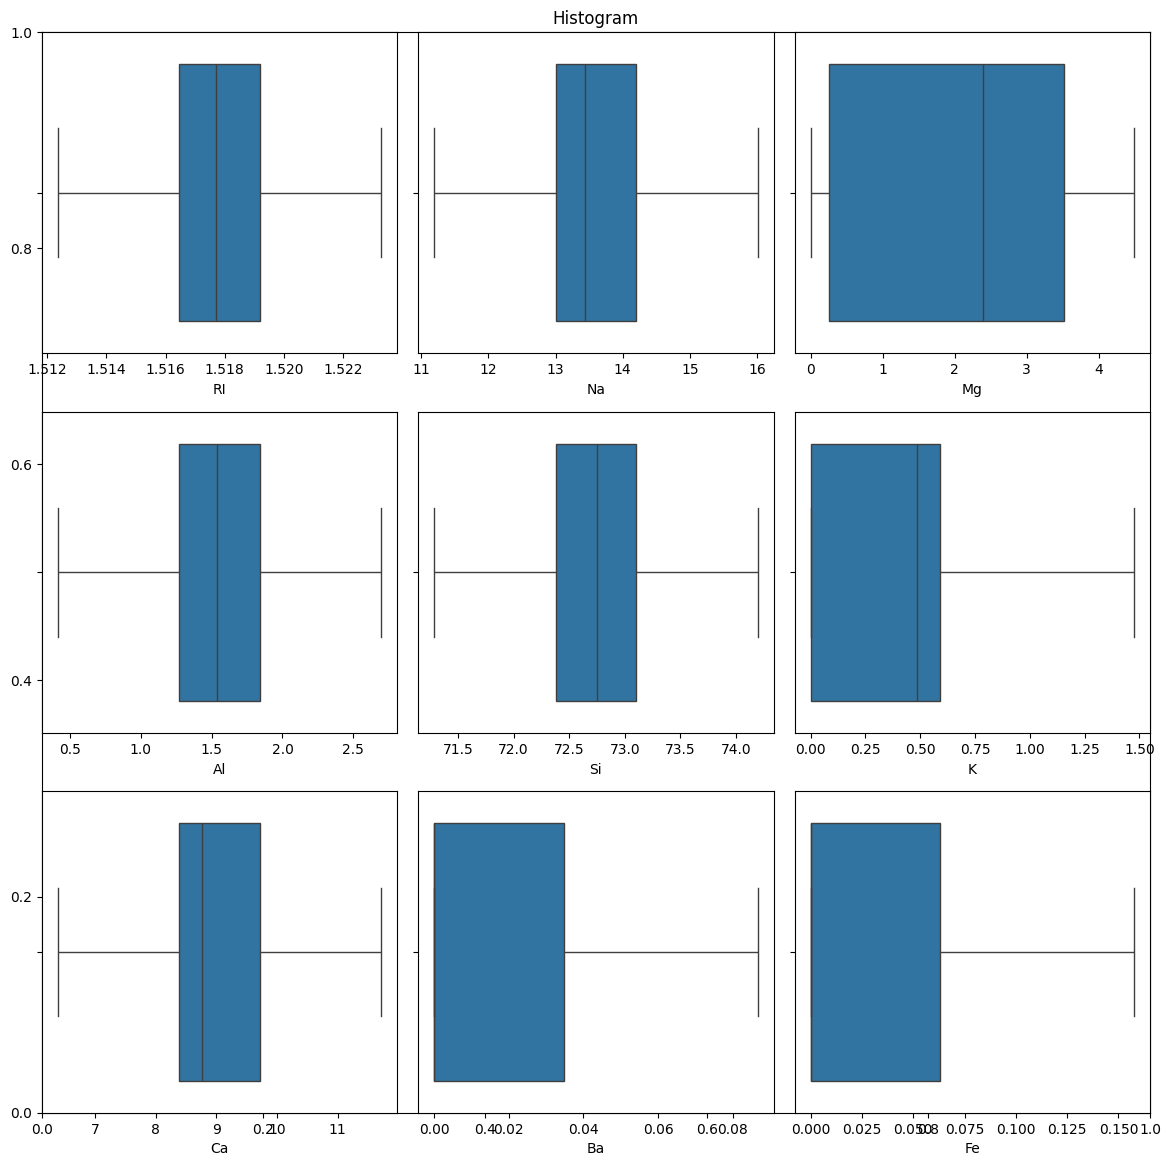

In [15]:
plt.figure(figsize=(12,12))
plt.title('Histogram')
for i,name in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=X[name])
    plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [17]:
X_transformed=scale.fit_transform(X)

In [18]:
X_df=pd.DataFrame(X_transformed,columns=X.columns)

In [19]:
X_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.308159,0.059921,1.568527,-0.930496,-1.422255,-0.905858,-0.259740,-0.576745,-0.607806
1,-0.163969,0.352337,0.981904,-0.416132,0.021993,0.202797,-1.032866,-0.576745,-0.607806
2,-0.783129,-0.068742,0.948947,-0.060034,0.417260,-0.034772,-1.074884,-0.576745,-0.607806
3,-0.142320,-0.443035,1.041225,-0.554615,-0.160439,0.440366,-0.705128,-0.576745,-0.607806
4,-0.246235,-0.372855,0.995086,-0.653531,0.554084,0.387573,-0.831181,-0.576745,-0.607806
...,...,...,...,...,...,...,...,...,...
451,-1.077158,1.516202,-1.390957,1.576907,1.303313,-1.064238,-0.468039,1.788747,-0.607806
452,-0.948305,0.743447,-1.390957,2.228361,0.724197,-0.930535,0.126324,1.788747,-0.059632
453,-0.234991,0.920184,-1.390957,0.767075,1.294519,-1.064238,-0.494235,1.788747,-0.607806
454,0.856723,0.872758,-1.390957,0.912450,1.053383,-1.064238,-0.491081,1.788747,-0.607806


In [20]:
new_df=pd.concat([X_df,y],axis=1)

In [21]:
X=new_df.drop('Type',axis=1)
y=new_df['Type']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf=RandomForestClassifier(n_estimators=100,max_depth=None)

In [26]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred=rf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,classification_report

In [39]:
random_forest_accuracy=round(accuracy_score(y_test,y_pred),2)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      0.82      0.88        17
           2       0.95      0.95      0.95        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.96        92
   macro avg       0.95      0.96      0.96        92
weighted avg       0.96      0.96      0.96        92



In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
base_estimator=DecisionTreeClassifier(max_depth=1)
ADB=AdaBoostClassifier(estimator=base_estimator)

In [33]:
import warnings 
warnings.filterwarnings('ignore')
ADB.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

In [34]:
y_pred1=ADB.predict(X_test)

In [55]:
adaboost_accuracy=round(accuracy_score(y_test,y_pred),2)

In [56]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.36      0.94      0.52        17
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        10
           5       0.82      0.64      0.72        14
           6       0.00      0.00      0.00        14
           7       0.64      0.50      0.56        18

    accuracy                           0.37        92
   macro avg       0.30      0.35      0.30        92
weighted avg       0.32      0.37      0.32        92



In [57]:
from sklearn.ensemble import BaggingClassifier

In [58]:
bag=BaggingClassifier(n_estimators=11)

In [59]:
bag.fit(X_train,y_train)

BaggingClassifier(n_estimators=11)

In [60]:
y_pred2=bag.predict(X_test)

In [61]:
bagging_accuracy=round(accuracy_score(y_test,y_pred2),2)

In [62]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.76      0.76      0.76        17
           2       0.89      0.89      0.89        19
           3       0.80      0.80      0.80        10
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



In [63]:
dict={'Algorithm':['Random Forest','Adaboost','Bagging'],
'Accuracy':[random_forest_accuracy,adaboost_accuracy,bagging_accuracy]}

In [64]:
pd.DataFrame(dict).set_index('Algorithm')

,Accuracy
Algorithm,
Random Forest,0.96
Adaboost,0.96
Bagging,0.90


1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging is an ensemble method that aims to reduce variance and prevent overfitting. It works by creating multiple subsets of the training data using bootstrap sampling (random sampling with replacement), training a separate model on each subset (usually high-variance models like decision trees), and then combining their predictions. For regression, predictions are averaged; for classification, majority voting is used. Bagging makes the model more stable and robust without focusing on correcting mistakes from previous models.


Boosting is an ensemble method that aims to reduce bias and improve accuracy by sequentially training models, where each new model focuses on correcting the errors of previous models. Samples misclassified in earlier iterations are given higher weights so that subsequent learners focus more on them. The final prediction is a weighted combination of all weak learners. Boosting creates a strong model from weak learners.

2.Explain how to handle imbalance in the data.

Imbalanced data occurs when one class has significantly more samples than another, which can bias a model toward the majority class. To address this, oversampling increases the number of minority class samples, often by duplicating existing ones, which balances the dataset but may risk overfitting. Undersampling reduces the number of majority class samples to achieve balance, though it can result in the loss of valuable information. SMOTE (Synthetic Minority Oversampling Technique) creates new synthetic samples for the minority class by interpolating between existing samples, helping the model learn better while reducing the risk of overfitting compared to simple oversampling. These techniques are commonly used to improve model performance on imbalanced datasets.